# Árvores II - Tarefa I



Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [5]:
!pip install --upgrade scikit-learn

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
features = pd.read_csv('features.txt',sep=" ", header=None)
features['Colunas'] = features[0].astype(str) + ' ' + features[1]
features = features.iloc[:,2:]
features = features.squeeze()
features.head()

0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
Name: Colunas, dtype: object

In [14]:
subject_train = pd.read_csv('subject_train.txt', sep =" ", header=None)
subject_train = subject_train.squeeze()
subject_train.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [15]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
X_train.rename(columns=features, inplace=True)
X_train['Subject'] = subject_train
X_train.set_index('Subject', append = True, inplace = True)
X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
subject_test = pd.read_csv('subject_test.txt', delimiter=' ', header=None)
subject_test = subject_test.squeeze()

X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
X_test.rename(columns=features, inplace=True)
X_test['Subject'] = subject_test
X_test.set_index('Subject', append=True, inplace=True)
X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [18]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

In [19]:
X_train_cut = X_train[['1 tBodyAcc-mean()-X','2 tBodyAcc-mean()-Y','3 tBodyAcc-mean()-Z']]
X_test_cut = X_test[['1 tBodyAcc-mean()-X','2 tBodyAcc-mean()-Y','3 tBodyAcc-mean()-Z']]

In [21]:
# y_train
y_train = pd.read_csv('y_train.txt', delim_whitespace=True, header=None)
y_train['Subject'] = subject_train
y_train.set_index('Subject', append=True, inplace=True)

# y_test
y_test = pd.read_csv('y_test.txt', delim_whitespace=True, header=None)
y_test['Subject'] = subject_test
y_test.set_index('Subject', append=True, inplace=True)

# exportando para csv
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [22]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=20)

In [23]:
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
       2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
       5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
       7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
       8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
       9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
       1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
       1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
       1.46351627e-04, 1.47352194e-04, 1.49244166e-04, 1.49492770e-04,
       1.50482754e-04, 1.51968146e-04, 1.55713461e-04, 1.60511546e-04,
       1.60628990e-04, 1.64239147e-04, 1.67323005e-04, 1.74342668e-04,
       1.74907961e-04, 1.75578030e-04, 1.78985873e-04, 1.81439304e-04,
       1.85996704e-04, 1.87333070e-04, 1.89065980e-04, 1.89796602e-04,
       1.96759215e-04, 2.01481091e-04, 2.01919050e-04, 2.02866775e-04,
      

In [24]:
ccp_alphas = ccp_alphas[::1]
ccp_alphas

array([0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
       2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
       5.84401136e-05, 6.17808017e-05, 6.59866112e-05, 6.73768888e-05,
       7.02851049e-05, 7.74168145e-05, 7.99585551e-05, 8.01474017e-05,
       8.28222484e-05, 8.29342439e-05, 8.49667199e-05, 9.21474511e-05,
       9.63598696e-05, 1.02953015e-04, 1.04280015e-04, 1.05722623e-04,
       1.06211126e-04, 1.10109332e-04, 1.20580361e-04, 1.24186720e-04,
       1.32053657e-04, 1.35233977e-04, 1.36017410e-04, 1.41963138e-04,
       1.46351627e-04, 1.47352194e-04, 1.49244166e-04, 1.49492770e-04,
       1.50482754e-04, 1.51968146e-04, 1.55713461e-04, 1.60511546e-04,
       1.60628990e-04, 1.64239147e-04, 1.67323005e-04, 1.74342668e-04,
       1.74907961e-04, 1.75578030e-04, 1.78985873e-04, 1.81439304e-04,
       1.85996704e-04, 1.87333070e-04, 1.89065980e-04, 1.89796602e-04,
       1.96759215e-04, 2.01481091e-04, 2.01919050e-04, 2.02866775e-04,
      

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [25]:
%%time
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_cut, y_train)
    clfs.append(clf)

CPU times: user 23.3 s, sys: 7.79 ms, total: 23.3 s
Wall time: 23.5 s


In [26]:
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
test_scores = [clf.score(X_test_cut, y_test) for clf in clfs]

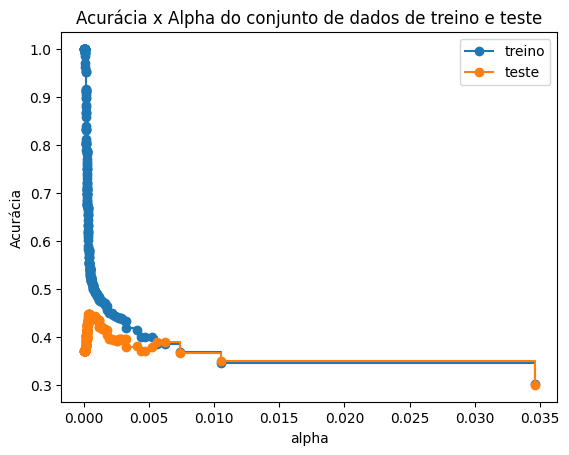

In [27]:
fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas, train_scores, marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='teste', drawstyle='steps-post')

ax.legend()
plt.show()

In [28]:
ind_best_tree = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
best_tree = clfs[ind_best_tree]
best_tree

DecisionTreeClassifier(ccp_alpha=0.00036355986671961156, random_state=2360873)

In [29]:
print(f"Acurácia: {best_tree.score(X_test_cut, y_test)*100:.2f}%")

Acurácia: 44.72%
